In [16]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [17]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Intensity/CSV/Harris_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-17-f7d81df2ee91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-17-f7d81df2ee91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,3560310.0,2979675.0,5092350.0,1493535.0,242760.0,160905.0,194055.0,93585.0,62220.0,39270.0,...,6490260.0,6330885.0,5120910.0,6434415.0,8055195.0,5803545.0,5139525.0,6588180.0,3989985.0,1
1,10315770.0,9446985.0,10219635.0,9846060.0,6166410.0,6322470.0,8988495.0,8540715.0,8793165.0,9222585.0,...,6478530.0,7416930.0,8539695.0,9567600.0,9467895.0,8049585.0,7297590.0,7993740.0,7083135.0,1
2,5972865.0,6231690.0,4830975.0,5693130.0,7109400.0,2249865.0,1608285.0,1729665.0,3264510.0,5458530.0,...,8048055.0,3971625.0,2737170.0,3747735.0,10261200.0,7899900.0,3675825.0,2102730.0,1919640.0,1
3,7234860.0,2377620.0,1864305.0,1620780.0,2133075.0,6064410.0,2260065.0,1510110.0,1325490.0,1758225.0,...,3083460.0,5175990.0,1042185.0,1325745.0,1256640.0,1249755.0,6127905.0,2869005.0,1614660.0,1
4,5065065.0,5948385.0,2515575.0,1640160.0,3749775.0,3906855.0,2305710.0,2943465.0,1567740.0,1695495.0,...,3348150.0,2911590.0,1881390.0,3466215.0,1767150.0,1524390.0,4188120.0,1892610.0,1141125.0,1


In [18]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [19]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7
              precision    recall  f1-score   support

          -1       0.79      0.81      0.80        88
           1       0.43      0.41      0.42        32

    accuracy                           0.70       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.69      0.70      0.70       120



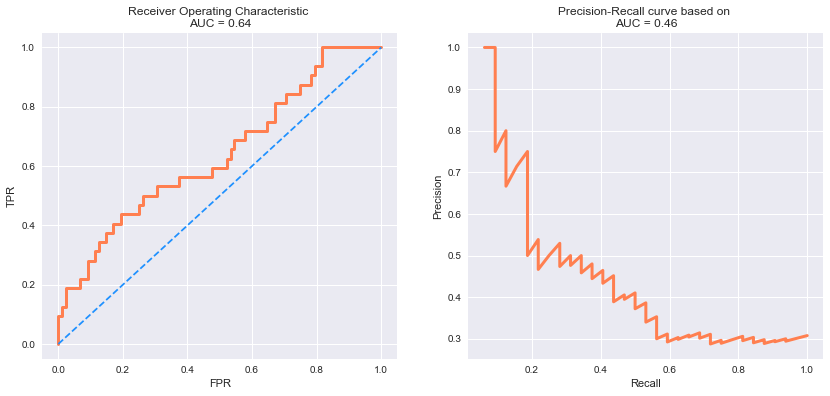

In [20]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()